# Context : Feature selection


Source : 


**Competition Description**
xxxx


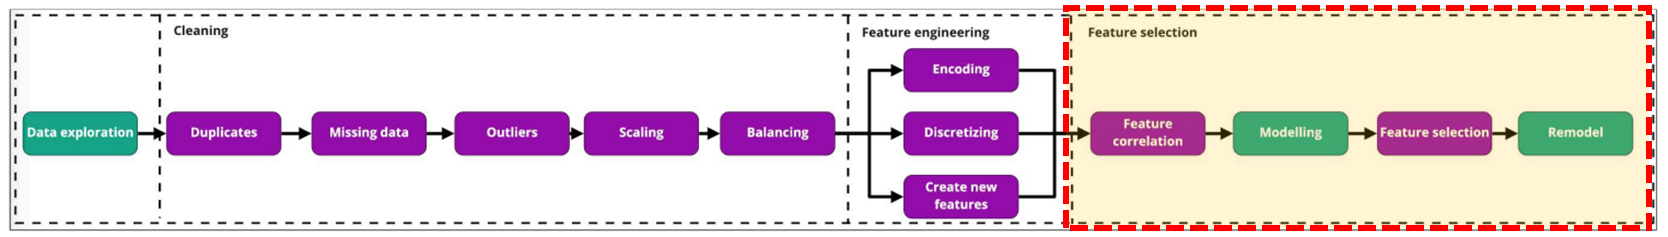


# Imports


In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

import os
import time
import pickle

import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from scipy.stats import iqr

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Imputers, scalers, encoders
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

# Pipelines, transformers
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer

# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Inspection
from sklearn.inspection import permutation_importance

from sklearn.metrics import mean_squared_error



# Retrieve data


## Get the raw data


In [2]:
#Retrieve data
path_to_data = '../data/raw_data/'
data = pd.read_csv(path_to_data + 'train.csv')
print(data.shape)
data.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Drop duplicates in rows


In [3]:
# Columns in which na rows must be dropped :
missing_rows_to_drop = ['MasVnrType','Electrical']

# Drop Columns in which na rows
print(f"Shape of data before : {data.shape}")
      
for col in missing_rows_to_drop:
    data.dropna(subset=col, axis=0, inplace=True)
      
print(f"Shape of data after : {data.shape}")


Shape of data before : (1460, 81)
Shape of data after : (1451, 81)


## Train test split


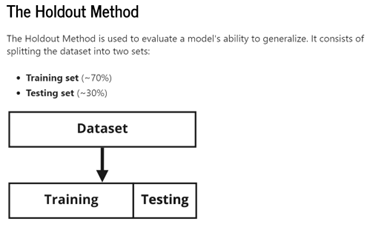



In [4]:
# Define target name
target_name = 'SalePrice'

In [5]:
# Define X and y
X = data.drop(columns= target_name)
y = data[target_name]

In [6]:
# Separating train set from test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display shapes
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of X_train : (1015, 80)
Shape of X_test : (436, 80)
Shape of y_train : (1015,)
Shape of y_test : (436,)


In [7]:
X_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
713,714,190,RL,60.0,9873,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Norm,2fmCon,1Story,4,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,160.0,TA,TA,CBlock,TA,TA,Av,ALQ,789,Unf,0,171,960,GasW,TA,N,SBrkr,960,0,0,960,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1970.0,Unf,2,576,TA,TA,Y,0,288,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
623,624,160,FV,NaN,2117,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,513.0,Gd,TA,PConc,Gd,TA,No,GLQ,420,Unf,0,336,756,GasA,Ex,Y,SBrkr,756,756,0,1512,0,0,2,1,2,1,Gd,4,Typ,1,TA,Detchd,2000.0,Unf,2,440,TA,TA,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
592,593,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,8,1982,2003,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,TA,Gd,No,GLQ,816,Unf,0,0,816,GasA,Ex,Y,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1985.0,Fin,2,816,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
631,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,108.0,Gd,TA,PConc,Gd,Gd,Mn,GLQ,24,Unf,0,1530,1554,GasA,Ex,Y,SBrkr,1554,0,0,1554,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,627,TA,TA,Y,156,73,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
158,159,60,FV,100.0,12552,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,222,Unf,0,769,991,GasA,Ex,Y,SBrkr,991,956,0,1947,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2004.0,RFn,2,678,TA,TA,Y,0,136,0,0,0,0,NaN,GdWo,NaN,0,5,2010,WD,Normal


In [8]:
y_train.head()

713    129000
623    168500
592    138000
631    209500
158    254900
Name: SalePrice, dtype: int64

## Get pipeline


In [9]:
# Load Pipeline from pickle file
pipeline = pickle.load(open("../data/pipeline.pkl","rb"))
pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop',
                                 ['Id', 'PoolQC', 'MiscFeature', 'Alley']),
                                ('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Fence', 'GarageType']),
                                ('pipeline-2',
                                 Pipelin...
                                  'RoofStyle', 'Electrical', 'Exterior1st',
                                  'Street', 'LandContour', 'Functional',
                                  'Utilities', 'LandSlope', 'Neighborhood',
                                  'MSZoning']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Po', 'Fa', 'TA',
                                                             'Gd', 'Ex'],
                                                            ['Po', 'Fa', 'TA',
                                                             'Gd', 'Ex'],
                                                            ['Po', 'Fa', 'TA',
                                                             'Gd', 'Ex'],
                                                            ['Po', 'Fa', 'TA',
                                                             'Gd', 'Ex']]),
                                 ['ExterQual', 'HeatingQC', 'ExterCond',
                                  'KitchenQual'])],
                  verbose_feature_names_out=False)

# Fitting_transforming


In [10]:
# Fitting the pipeline to the train set
pipeline.set_output(transform="pandas")
pipeline.fit(X_train)

# Transform the initial train set
# X_train_new = pd.DataFrame(pipeline.transform(X_train), 
#                            columns=pipeline.get_feature_names_out(),
#                             index = X_train.index)

X_train_new = pipeline.transform(X_train)
print(X_train_new.shape)

# Transform the initial test set
# X_test_new = pd.DataFrame(pipeline.transform(X_test), 
#                           columns=pipeline.get_feature_names_out(),
#                          index = X_test.index)

X_test_new = pipeline.transform(X_test)
print(X_test_new.shape)


(1015, 228)
(436, 228)


#  Feature correlation


## Correlation heatmap

<span style="font-family:Comic Sans MS; color:red"> /!\ Use only if number of features is reasonnable !  </span>



In [11]:
# # Heatmap of pairwise correlations
# correlation_matrix = data.corr()
# column_names = correlation_matrix.columns
# sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

## Correlation matrix


### Pair correlation

In [12]:
# Merge X_train and y_train for correlation study
merged_df = pd.merge(X_train_new.reset_index(), y_train.reset_index()).drop(columns='index')

#Create a dataframe listing pair correlations and absolute correlations
correlation_matrix = merged_df.corr()

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

corr_df.sort_values(by="absolute_correlation", ascending=False, inplace = True)
corr_df

,feature_1,feature_2,correlation,absolute_correlation
38542,Exterior1st_CBlock,Exterior2nd_CBlock,1.000000e+00,1.000000e+00
16198,Exterior2nd_CBlock,Exterior1st_CBlock,1.000000e+00,1.000000e+00
35165,SaleCondition_Partial,SaleType_New,9.880009e-01,9.880009e-01
29465,SaleType_New,SaleCondition_Partial,9.880009e-01,9.880009e-01
18266,Exterior2nd_VinylSd,Exterior1st_VinylSd,9.760157e-01,9.760157e-01
...,...,...,...,...
4999,LotFrontage,Utilities_NoSeWa,4.836030e-18,4.836030e-18
39638,Exterior1st_Stone,LotFrontage,4.787236e-18,4.787236e-18
4982,LotFrontage,Exterior1st_Stone,4.787236e-18,4.787236e-18
20173,RoofMatl_Metal,LotFrontage,3.133661e-18,3.133661e-18


<span style="font-family:Comic Sans MS; color:red"> /!\ Check columns with high correlations (greater than a threshold) !  </span>





In [13]:
# Remove highly correlated features >= threshold (absolute_value)
correlation_threshold = 0.98
correlated_features = corr_df[(corr_df['absolute_correlation'] >= correlation_threshold)]
print(correlated_features.shape)
correlated_features

(4, 4)


,feature_1,feature_2,correlation,absolute_correlation
38542,Exterior1st_CBlock,Exterior2nd_CBlock,1.000000,1.000000
16198,Exterior2nd_CBlock,Exterior1st_CBlock,1.000000,1.000000
35165,SaleCondition_Partial,SaleType_New,0.988001,0.988001
29465,SaleType_New,SaleCondition_Partial,0.988001,0.988001


<span style="font-family:Comic Sans MS; color:red"> Let's remove duplicates between feat_1 and feat_2 !  </span>






In [14]:
# Create a set from feature_1 and feature_2
correlated_features['Set'] = correlated_features.apply(lambda row : {row['feature_1'], row['feature_2']}, axis=1)

# Cast elements of sets to string 
correlated_features['Set'] = correlated_features['Set'].apply(lambda x : str(x))
correlated_features

# Drop duplicates in set column (no more duplicates between feature_1 and feature_2)
correlated_features.drop_duplicates(subset=['Set'], inplace=True)

# Drop Set column => No use anymore
correlated_features.drop(columns=['Set'], inplace=True)

print(correlated_features.shape)
correlated_features

(2, 4)


,feature_1,feature_2,correlation,absolute_correlation
38542,Exterior1st_CBlock,Exterior2nd_CBlock,1.000000,1.000000
35165,SaleCondition_Partial,SaleType_New,0.988001,0.988001


<span style="font-family:Comic Sans MS; color:red"> Let's drop columns with high correlations (i.e correlation greater than a threshold) !  </span>








In [15]:
# Columns to drop because of high correlation with other columns
high_corr_feat_to_drop = correlated_features['feature_2'].values.tolist()
high_corr_feat_to_drop

['Exterior2nd_CBlock', 'SaleType_New']

### Correlation with target

In [16]:
# Number of high correlated features wanted
high_corr_feats = 5

#Create a dataframe listing correlations between a feature and the target and absolute correlations
corr_df[corr_df["feature_1"] == target_name].head(high_corr_feats)


,feature_1,feature_2,correlation,absolute_correlation
52236,SalePrice,OverallQual,0.785648,0.785648
52243,SalePrice,GrLivArea,0.716773,0.716773
52436,SalePrice,ExterQual,0.686436,0.686436
52439,SalePrice,KitchenQual,0.671362,0.671362
52258,SalePrice,GarageCars,0.637296,0.637296
52259,SalePrice,GarageArea,0.627785,0.627785
52253,SalePrice,1stFlrSF,0.606243,0.606243
52242,SalePrice,TotalBsmtSF,0.605878,0.605878
52231,SalePrice,BsmtQual,0.594897,0.594897
52268,SalePrice,FullBath,0.561062,0.561062


In [17]:
# # Extract columns that have high correlation with target (i.e correlation > threshold)
# correlation_threshold_target = 0.6
# corr_condition_target = (corr_df["feature_1"] == target_name) & (corr_df["absolute_correlation"] > correlation_threshold_target)

# high_corr_with_target = corr_df[corr_condition_target]['feature_2'].values.tolist()
# high_corr_with_target

<span style="font-family:Comic Sans MS; color:red"> Let's drop columns with high correlation with target (i.e correlation greater than a threshold) !  </span>







In [18]:
# # Drop
# print(train_set.shape)
# data = train_set.drop(columns=high_corr_with_target)
# print(train_set.shape)

### Scatter matrix with high correlated features with the target value



In [19]:
#Retrieve a list of the most correlated features to the target (max = threshold)
high_corr_feats_serie = corr_df[corr_df["feature_1"] == target_name]['feature_2']
high_corr_feats_list = high_corr_feats_serie[:high_corr_feats].values.tolist()

# Add target name to the list of high correlated features (relatively to the target)
high_corr_feats_list.append(target_name)

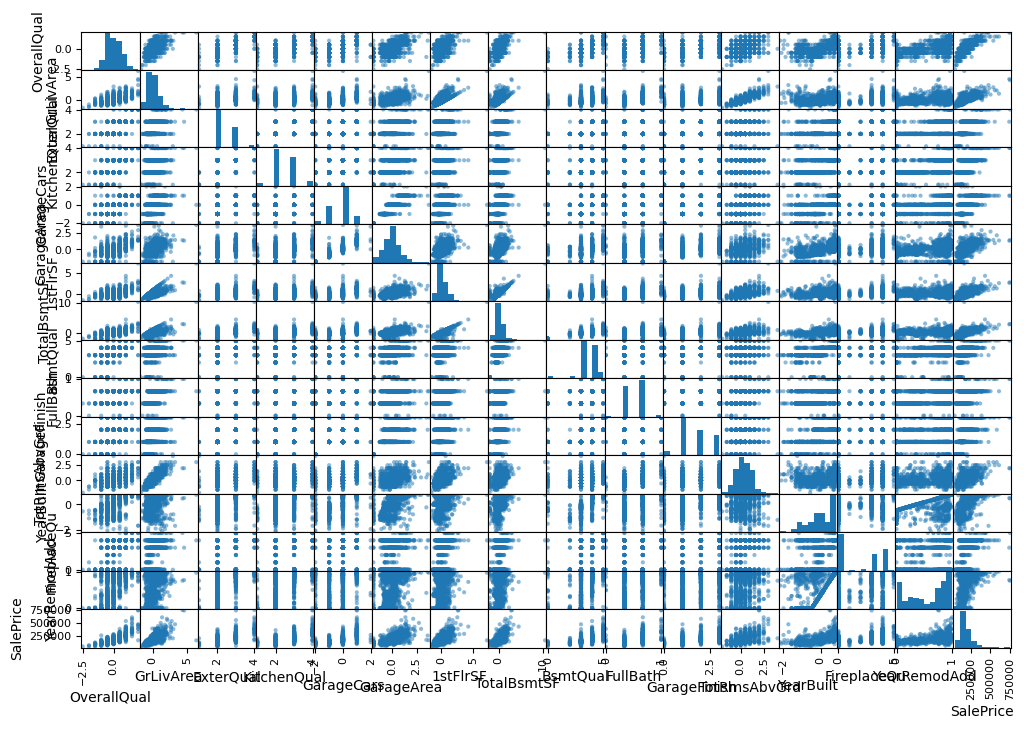

In [20]:
# Display scatter matrix for numerical
scatter_matrix(merged_df[high_corr_feats_list], figsize= (12,8))
plt.show()


### Columns to drop due to high correlation with other columns




In [21]:
# Drop
print(X_train_new.shape)
X_train_new.drop(columns=high_corr_feat_to_drop, inplace=True)
print(X_train_new.shape)

(1015, 228)
(1015, 226)


# Modelling

## Base model


In [22]:
print(X_train_new.shape)
print(y_train.shape)

(1015, 226)
(1015,)


In [23]:
# Models to be cross_validated : 
lin_model = LinearRegression()
sgd_regressor = SGDRegressor()
lasso_regressor = Lasso()
elastic_net = ElasticNet()
svr_regressor = SVR()
gb_regressor = GradientBoostingRegressor()
rf_regressor = RandomForestRegressor()
ridge_regressor = Ridge()

models = [
            ridge_regressor,
            rf_regressor,
            gb_regressor
        ]

# models = [lin_model,
#           sgd_regressor,
#           lasso_regressor, 
#           elastic_net,
#           svr_regressor,
#           gb_regressor,
#           rf_regressor,
#           ridge_regressor]

models_name = {
#                 'LinearRegression()' : LinearRegression(),
#                 'SGDRegressor()' : SGDRegressor(),
#                 'Lasso()' : Lasso(),
#                 'ElasticNet()' : ElasticNet(),
#                 'SVR()' : SVR(),
                'GradientBoostingRegressor()' : GradientBoostingRegressor(),
                'RandomForestRegressor()' : RandomForestRegressor(),
                'Ridge()' : Ridge()
            }



In [24]:
# Scoring method
scoring_method = 'neg_mean_squared_error'

In [25]:
def get_mean_score_cv(model, X_train_new, scoring_method = None):  
    # Cross validation
    cv_results = cross_validate(estimator = model,
                                X = X_train_new,
                                y = y_train,
                                cv = 5,
                                n_jobs= -1,
                                verbose=0,
                                scoring= scoring_method)

    return - cv_results['test_score'].mean()

In [26]:
def get_cross_validate_mean_score(model,X_train_new, scoring_method = None):
    # Cross Validation
    cv = cross_val_score(model, 
                        X_train_new, 
                        y_train , 
                        cv=5, 
                        scoring=scoring_method)
    cross_valid_score = - np.mean(cv)
    return cross_valid_score

In [27]:
print(f"The cv mean score is : {get_mean_score_cv(lin_model,X_train_new, scoring_method, )}")
print(f"The cross_validate mean score is : {get_cross_validate_mean_score(lin_model, X_train_new, scoring_method)}")

The cv mean score is : 2.3010528804413637e+22
The cross_validate mean score is : 2.5165070603325614e+22


In [28]:
# Computing cross val mean score on several models
dict_score = {}
model_name = []
mean_score =[]

for model in models:    
    result = get_cross_validate_mean_score(model,X_train_new, scoring_method)
    model_name.append(str(model))
    mean_score.append(result)
    
dict_score['model'] = model_name
dict_score['mean_score'] = mean_score

result_score = pd.DataFrame(dict_score)
result_score.sort_values('mean_score', ascending =True, inplace=True)
result_score

,model,mean_score
2,GradientBoostingRegressor(),9.045438e+08
1,RandomForestRegressor(),1.022936e+09
0,Ridge(),1.512307e+09


# Feature selection

## Feature permutation

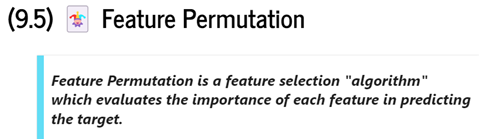


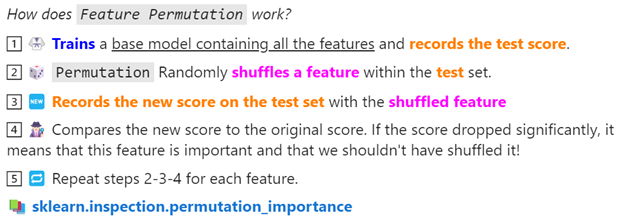


In [29]:

def get_strong_features(model,numb_strong_features):
    ''' 
    This function extracts the strong features (i.e numb_strong_features) that affects the score.
    '''
    # Fit model
    fitted_model = LinearRegression().fit(X_train_new, y_train) 

    # Performs Permutation
    permutation_score = permutation_importance(fitted_model, X_train_new, y_train, n_repeats=10) 

    # Unstack results showing the decrease in performance after shuffling features
    importance_df = pd.DataFrame(np.vstack((X_train_new.columns,
                                            permutation_score.importances_mean)).T) 
    importance_df.columns=['feature','score decrease']

    # Show the important features
    importance_df = importance_df.sort_values(by="score decrease", ascending = False) 

    # Define number of strong features to keep according to importance
#     numb_strong_features = 20

    # Record the strong features in a list
    strong_features = importance_df['feature'].iloc[:numb_strong_features].values.tolist()
    return strong_features


In [30]:
# Retrieve the most important features for each model based on feature permutation
dict_strong = {}
model_strong =[]
feat_strong =[]

for model in models:
    model_strong.append(str(model))
    feat_strong.append(get_strong_features(model, 30))

dict_strong['model'] = model_strong
dict_strong['strong_features'] = feat_strong

result_strong = pd.DataFrame(dict_strong)
result_strong;

In [31]:
# Based on each model, we have extracted the most impactful features (per model)
result_strong

,model,strong_features
0,Ridge(),"[GarageType_Attchd, GarageType_Detchd, BsmtFin..."
1,RandomForestRegressor(),"[GarageType_Attchd, GarageType_Detchd, BsmtFin..."
2,GradientBoostingRegressor(),"[GarageType_Attchd, GarageType_Detchd, BsmtFin..."


# Remodel

<span style="font-family:Comic Sans MS; color:red"> Based on the extracted most impactful features, let's compute the mean score again. </span>


In [32]:
# Based on the extracted most impactful features, let's compute the mean score again.
dic = {}
model_ = []
score_ =[]

for model in models:
        strg_feat = result_strong[result_strong['model'] == str(model)]['strong_features'].values.tolist()[0]
        
        result = get_cross_validate_mean_score(model,
                                               X_train_new[strg_feat],
                                               scoring_method)
        model_.append(str(model))    
        score_.append(result)
    
dic['model'] = model_
dic['mean_score'] = score_

result_score = pd.DataFrame(dic)
result_score.sort_values('mean_score', ascending =True, inplace=True)
result_score

,model,mean_score
1,RandomForestRegressor(),1.407141e+09
2,GradientBoostingRegressor(),1.489353e+09
0,Ridge(),2.274478e+09


<span style="font-family:Comic Sans MS; color:red"> Let's keep the most efficient model and the associated strong features.</span>



In [33]:
# Extract the most efficient model (lower mean score) and associated strong features
chosen_mdl_name = result_score[result_score['mean_score'] == result_score['mean_score'].min()]['model'].values.tolist()[0]
chosen_mdl = models_name[chosen_mdl_name]

chosen_feat =result_strong[result_strong['model'] == chosen_mdl_name]['strong_features'].values.tolist()[0]


# Create final pipeline with model


In [34]:
#Retrieve data
path_to_data = '../data/raw_data/'
data = pd.read_csv(path_to_data + 'train.csv')
print(data.shape)
data.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [35]:
# Columns in which na rows must be dropped :
missing_rows_to_drop = ['MasVnrType','Electrical']

# Drop Columns in which na rows
print(f"Shape of data before : {data.shape}")
      
for col in missing_rows_to_drop:
    data.dropna(subset=col, axis=0, inplace=True)
      
print(f"Shape of data after : {data.shape}")

Shape of data before : (1460, 81)
Shape of data after : (1451, 81)


In [36]:
# Define target name
target_name = 'SalePrice'

In [37]:
# Define X and y
X = data.drop(columns= target_name)
y = data[target_name]

In [38]:
# Separating train set from test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display shapes
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of X_train : (1015, 80)
Shape of X_test : (436, 80)
Shape of y_train : (1015,)
Shape of y_test : (436,)


In [39]:
# Load Pipeline from pickle file
pipeline = pickle.load(open("../data/pipeline.pkl","rb"))

pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop',
                                 ['Id', 'PoolQC', 'MiscFeature', 'Alley']),
                                ('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Fence', 'GarageType']),
                                ('pipeline-2',
                                 Pipelin...
                                  'RoofStyle', 'Electrical', 'Exterior1st',
                                  'Street', 'LandContour', 'Functional',
                                  'Utilities', 'LandSlope', 'Neighborhood',
                                  'MSZoning']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Po', 'Fa', 'TA',
                                                             'Gd', 'Ex'],
                                                            ['Po', 'Fa', 'TA',
                                                             'Gd', 'Ex'],
                                                            ['Po', 'Fa', 'TA',
                                                             'Gd', 'Ex'],
                                                            ['Po', 'Fa', 'TA',
                                                             'Gd', 'Ex']]),
                                 ['ExterQual', 'HeatingQC', 'ExterCond',
                                  'KitchenQual'])],
                  verbose_feature_names_out=False)

In [40]:
# Fitting the pipeline to the train set
pipeline.set_output(transform="pandas")
pipeline.fit(X_train)

X_train_new = pipeline.transform(X_train)
print(X_train_new.shape)

X_test_new = pipeline.transform(X_test)
print(X_test_new.shape)

(1015, 228)
(436, 228)


In [41]:
# # Chosen model is : 
# chosen_mdl = RandomForestRegressor()
# chosen_feat = result_strong[result_strong['model'] == str(chosen_mdl)]['strong_features'].values.tolist()[0]

In [42]:
# We only use the strongest features extracted beforehand.
print(X_train_new.shape)
X_train_new = X_train_new[chosen_feat]
print(X_train_new.shape)

print(X_test_new.shape)
X_test_new = X_test_new[chosen_feat]
print(X_test_new.shape)

(1015, 228)
(1015, 30)
(436, 228)
(436, 30)


# Evaluate on test set


In [43]:
# Instantiate, and fit linear regression model
# chosen_mdl = RandomForestRegressor()
chosen_mdl.fit(X_train_new, y_train)

RandomForestRegressor()

In [44]:
final_predictions = chosen_mdl.predict(X_test_new)
final_predictions_df = pd.DataFrame(final_predictions, index=y_test.index)
final_predictions_df.head()

,0
540,323746.79
757,159047.55
49,125570.50
1456,237110.74
141,318733.86


In [45]:
pd.merge(final_predictions_df.reset_index(), y_test.reset_index())

,index,0,SalePrice
0,540,323746.790000,315000
1,757,159047.550000,158900
2,49,125570.500000,127000
3,1456,237110.740000,210000
4,141,318733.860000,260000
...,...,...,...
431,135,229867.220000,174000
432,1185,122131.000000,104900
433,1452,127268.400000,145000
434,1140,126747.000000,139000


In [46]:
# Compute root mean squared error
final_rmse = mean_squared_error(y_test,final_predictions, squared=False )
final_rmse

34583.973139454094

In [47]:
# Confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(   confidence, 
                            len(squared_errors) - 1, 
                            loc=squared_errors.mean(),
                           scale=stats.sem(squared_errors)
                       )
        )

array([23898.91640226, 42672.52266996])